O dado apresentado contêm dados sobre uma pesquisa realizada com povos indígenas. Ele está em formato Excel e contem duas tabelas. uma sobre dados dos índios entrevistado e o pesquisador que os entrevisto, outro com as respostas do questionário passado para índio.  Eles podem ser adquiridos no Drive por esse.

Será feita a seguinte pergunta para ser extraída dos dados:

- **Qual pesquisador trabalhou mais?** (de um gráfico com estes dados, mas este gráfico não pode conter nomes repetidos)
- **Como está distribuída a escolaridade dos índios**
- **Informe, através de um gráfico, como está distribuído a a idade da população indígena, separada por povo e sexo.** Qual o melhor gráfico para informar estes dados?

- A aba com a resposta dos questionário estão esta posta de maneira que as resposta são apenas Sim ou Não, porém isto atrapalha a criação de gráficos para perguntas que tem mais de uma resposta como "De onde vem a energia de sua família", manipule os dados de maneira una as resposta de uma mesma pergunta.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)


## Lendo dados Povos indigenas

In [2]:
#Lendo arquivo Excel
dados = pd.ExcelFile('Povos_indigenas.xlsx')

In [3]:
#Verificando abas
dados.sheet_names

['questionários', 'respostas']

In [4]:
#Lendo aba questionario
questinarios = pd.read_excel(dados,'questionários')
questinarios.head(3)

,Unnamed: 0,Código final,Cód. Povo,Cód. Ald.,Cód. Num.,Nome do arquivo,Pesquisador indígena,Aldeia do entrevistado,Local da entrevista,Data da entrevista,Observações do entrevistador,Sexo,Idade,idade,Parentesco,Escolaridade,Ocupação,Detalhe
0,0,AR . 26 . 1,Pov1,26,1.0,A26G19,Charles Robert Darwin,26 de Julho,26 de Julho,2018-02-03 00:00:00,NaN,Feminino,17,15-64,chefe da casa,Fundamental,Estudante,estudante/pesca
1,1,AR . 26 . 1,Pov1,26,1.0,A26G19,Charles Robert Darwin,26 de Julho,26 de Julho,43134,NaN,Masculino,22,15-64,.,Fundamental,Prestador de serviço eventual,caça/pesca/roça
2,2,AR . LA . 2,Pov1,LA,2.0,AAA31,Oswaldo Gonçalves Cruz,Laguinho,na casa da mãe,NaN,NaN,Masculino,37,15-64,marido,Superior,Funcionário da saúde,NaN


In [5]:
#Lendo aba resposta
respostas = pd.read_excel(dados,'respostas')
respostas.head(3)

,Unnamed: 0,Código final,Código aldeia,A casa da sua família é feita de: MADEIRA,A casa da sua família é feita de: MATERIAL/TIJOLO,De onde vem a energia da casa da sua família? NÃO TEM,De onde vem a energia da casa da sua família? POSTE,De onde vem a energia da casa da sua família? MOTOR,Na casa da sua família tem: TV,Na casa da sua família tem: CELULAR,...,Classificação 2,Quais são os três principais problemas enfrentados pela sua comunidade? 3,Classificação 3,O que sua famólia acha que pode mudar na sua região com a chegada da mina da Votorantim?,Classificação Votorantim: MUDANÇAS BOAS,Classificação Votorantim: MUDANÇAS RUINS,Você acha que há risco dos Cinta Larga perderem sua língua? SIM,Você acha que há risco dos Cinta Larga perderem sua língua? NÃO,Como está o uso da língua Cinta Larga pelas crianças e jovens? TODOS OS JOVENS E CRIANÇAS FALAM MUITO BEM EM CINTA LARGA,Como está o uso da língua Cinta Larga pelas crianças e jovens? OS JOVENS E CRIANÇAS ESTÃO USANDO CADA VEZ MENOS A LÍNGUA CINTA LARGA
0,0,NaN,NaN,1A,1B,2A,2B,2C,3A,3B,...,NaN,35C,NaN,36,NaN,NaN,37A,37B,38A,38B
1,1,AR . 26 . 1,26,Sim,NaN,.,.,.,Sim,Sim,...,Recursos,as estradas que são muito ruim quando começa a...,Locomoção,um ponto bom: vai vim muito recurso pro nosso ...,Educação/saúde,Doenças/Drogas/Brigas,NaN,NaN,NaN,NaN
2,2,AR . LA . 2,LA,Sim,NaN,NaN,Sim,NaN,Sim,Sim,...,Energia,falta de apoio pelas ONGS,Apoio,Positivos: acredito eu que vai melhorar as est...,Locomoção/Recursos em geral,Invasões/Impacto ambiental,NaN,NaN,NaN,NaN


## Analizando questionario

In [6]:
questinarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 18 columns):
Unnamed: 0                      1535 non-null int64
Código final                    506 non-null object
Cód. Povo                       506 non-null object
Cód. Ald.                       506 non-null object
Cód. Num.                       506 non-null float64
Nome do arquivo                 506 non-null object
Pesquisador indígena            506 non-null object
Aldeia do entrevistado          506 non-null object
Local da entrevista             465 non-null object
Data da entrevista              472 non-null object
Observações do entrevistador    259 non-null object
Sexo                            506 non-null object
Idade                           506 non-null object
idade                           1535 non-null object
Parentesco                      506 non-null object
Escolaridade                    506 non-null object
Ocupação                        506 non-null object
Detalhe

É possivel verificar que varios dados estão como objeto, quando deveriam estar como numeros (caso de idade)

Também e possivel analisar que a aba idade esta com 1535 dados, enquanto as outras chegam no maximo a 506, 
o que demonstra que provavelmente temos "lixo" nessa coluna

# Respondendo perguntas

### 1 - Qual pesquisador trabalhou mais? (de um gráfico com estes dados, mas este gráfico não pode conter nomes repetidos)

In [7]:
questinarios['Pesquisador indígena'].value_counts()

Galileu Galilei            82
Albert Einstein            80
Marie Curie                62
Ada Lovelace               62
Claude Lévi-Strauss        61
Alan Mathison Turing       52
Stephen William Hawking    45
Charles Robert Darwin      30
Oswaldo Gonçalves Cruz     24
claude Lévi-Strauss         8
Name: Pesquisador indígena, dtype: int64

**Obs:**  Perceba que Claude Lévi-Strauss, aparece duas vezes, uma letra maiuscula outra não, temos que tratar isso 

**Tratando nomes repetidos**

In [8]:
def tratarNomes(nome):
    if type(nome) != float:
        return nome.title()
questinarios['Pesquisador indígena'] = questinarios['Pesquisador indígena'].apply(tratarNomes)

In [9]:
questinarios['Pesquisador indígena'].value_counts()

Galileu Galilei            82
Albert Einstein            80
Claude Lévi-Strauss        69
Marie Curie                62
Ada Lovelace               62
Alan Mathison Turing       52
Stephen William Hawking    45
Charles Robert Darwin      30
Oswaldo Gonçalves Cruz     24
Name: Pesquisador indígena, dtype: int64

**Resposta com gráfico**

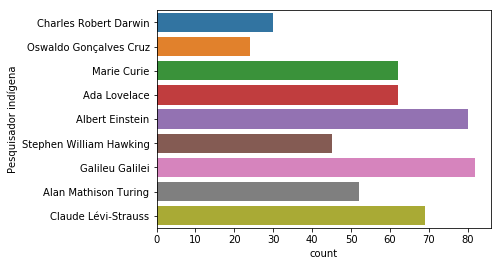

In [10]:
sns.countplot(data=questinarios,y='Pesquisador indígena');

**Gráfico em ordem crescestem** 

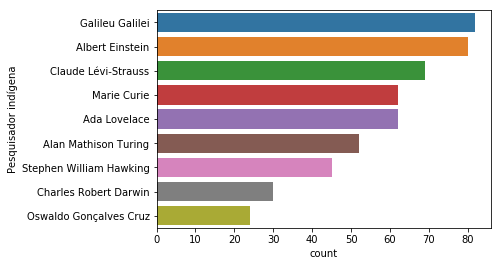

In [11]:
ordem = questinarios['Pesquisador indígena'].value_counts()
sns.countplot(data=questinarios,y='Pesquisador indígena',order = ordem.index);

### 2 - Como está distribuída a escolaridade dos índios?

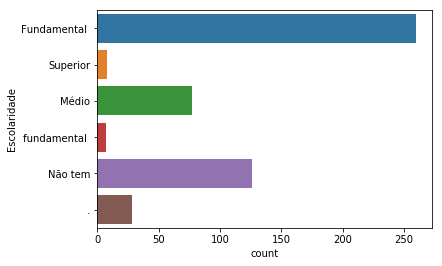

In [12]:
sns.countplot(data=questinarios,y='Escolaridade');

**Obs:** Aqui temos um problema similar ao do exercicio anterior com a palavra fundamental, 
além distom temos o '.' e valores sem dados, vamos tratar isto retirando os pontos e tratando os nomes

In [18]:
def tratarNomes(nome):
    if type(nome) != float:
        if nome == '.':
            return 
        if type(nome) == str:
            return nome.title()
questinarios['Escolaridade'] = questinarios['Escolaridade'].apply(tratarNomes) 

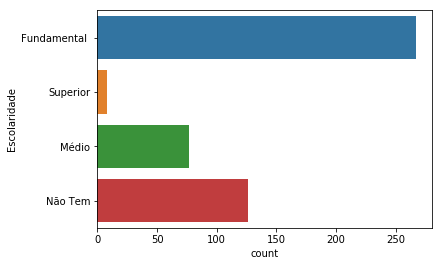

In [19]:
sns.countplot(data=questinarios,y='Escolaridade');

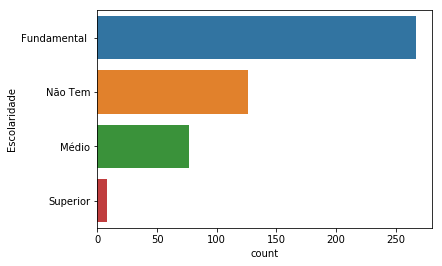

In [20]:
#Ordernado 
ordem = questinarios['Escolaridade'].value_counts()
sns.countplot(data=questinarios,y='Escolaridade',order=ordem.index);

### 3 - Informe, através de um gráfico, como está distribuído a a idade da população indígena, separada por povo e sexo. Qual o melhor gráfico para informar estes dados?

In [21]:
questinarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 18 columns):
Unnamed: 0                      1535 non-null int64
Código final                    506 non-null object
Cód. Povo                       506 non-null object
Cód. Ald.                       506 non-null object
Cód. Num.                       506 non-null float64
Nome do arquivo                 506 non-null object
Pesquisador indígena            506 non-null object
Aldeia do entrevistado          506 non-null object
Local da entrevista             465 non-null object
Data da entrevista              472 non-null object
Observações do entrevistador    259 non-null object
Sexo                            506 non-null object
Idade                           506 non-null object
idade                           1535 non-null object
Parentesco                      506 non-null object
Escolaridade                    478 non-null object
Ocupação                        506 non-null object
Detalhe

**Obs:** Primeira coisa que devemos perceber é que idade não é uma coluna com dados numericos, isto deve ser tratado.

Vamos ver se conseguimos converter diretamente os dados

In [22]:
#A função abaixo da error pois a presença da str '.' no meio do valores de idade, e necessario tratar isto
# questinarios['Idade'].astype(int)

In [23]:
def trataridade(valor):
    if type(valor) == str and valor.isnumeric(): 
        return int(valor)
    if type(valor) == int:
        return valor
    else:
        return
questinarios['Idade2'] = questinarios['Idade'].apply(trataridade)

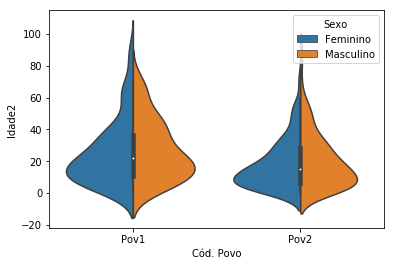

In [20]:
## Gerando grafico
sns.violinplot(data=questinarios,y='Idade2',x='Cód. Povo',hue='Sexo',split=True);

## Desafio

**1º modo: Utilizando Dataframe e concat**

In [21]:
saida = pd.DataFrame()

#Variavel global para guardar a resposta
global nome

#Função para trocar SIM pela resposta
def func(x):
    if x == 'Sim':
        return nome
    else:
        return
    
for colum in respostas:
    #Verificando se a coluna tem pergunta e resposta
    if ('?' in colum) or (':' in colum):
        if '?' in colum:
            split = colum.split('?')
        elif ":" in colum:
            split = colum.split(':')
        
        #retirando a pergunta e a resposta
        pergunta = split[0]
        nome = split[1]
        dados = respostas[colum].apply(func)
        
        #Criando a coluna em um novo DataFrame
        if pergunta in saida:
            #Se a pergunta existe faça um concat dela com a pergunta corrente no dataFrame
            dados.dropna(inplace=True)
            aux = saida[pergunta].drop(dados.index)
            saida[pergunta] = pd.concat([dados,aux])
        else:
            #Se a pergunta não existe crie ela no DataFrame
            saida[pergunta] = dados

In [22]:
saida.head(3)

,A casa da sua família é feita de,De onde vem a energia da casa da sua família,Na casa da sua família tem,Como sua família fica sabendo das notícias importantes para a sua comunidade,Sua família,Como está a saúde da sua família,Sua família usa remédios ou tratamentos indígenas,Têm jovens da sua família que estão aprendendo a usar remédios e tratamentos indígenas,Sua família acha importante valorizar o conhecimento de remédios e tratamentos indígenas,Têm pessoas da sua família morando na cidade para estudar,...,Sua família vai à cidade,Como sua família vai para a cidade,O que sua família vai fazer na cidade,O que sua família vai fazer na cidade: E O QUE MAIS,Aonde sua família se hospeda quando está na cidade,Quais são os três principais problemas enfrentados pela sua comunidade,O que sua famólia acha que pode mudar na sua região com a chegada da mina da Votorantim,Classificação Votorantim,Você acha que há risco dos Cinta Larga perderem sua língua,Como está o uso da língua Cinta Larga pelas crianças e jovens
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,MADEIRA,None,VENTILADOR,OUTRO,TEM DIFICULDADES DE RECEBER NOTÍCIAS,BOA,NÃO,SIM,SIM,SIM,...,TODA SEMANA,CARRO DA FUNAI OU DA SESAI,PARTICIPAR DE REUNIÕES,None,CASA DA SUA FAMÍLIA,None,None,None,None,None
2,MADEIRA,POSTE,MOTO,INTERNET,SABE DAS NOTÍCIAS,BOA,NÃO,NÃO,SIM,SIM,...,None,CARRO DA FUNAI OU DA SESAI,PARTICIPAR DE REUNIÕES,None,CASA DA SUA FAMÍLIA,None,None,None,None,None


**2º Modo: Utilizando dicionario**


In [23]:
#Esta Parte do programa faz com as colunas do mesmo tipo se unam, troncando as resposta Sim pela resposta
dic = {}
def addItens(original,coluna,resposta):
    #Esta função faz com que em uma coluna se tiver Sim seja trocado pela variavel resposta
    lista = dic[coluna]
    for pos in range(len(dic[coluna])):
        if original[pos] == 'Sim':
            lista[pos] = str(resposta)
    dic[coluna] = lista

for item in respostas:
    #Este item verifica todas colunas, retirando a pergunta e aplicando o a função aplicando a função acima
    #Ela unem colunas parecidas
    if ('?' in item) or (':' in item) :
        interrogacao = item.find('?')
        if interrogacao == -1:
            interrogacao = item.find(':')
        resposta = item[interrogacao+2:]
        coluna = item[:interrogacao]
        colunaOri = respostas[item]
        if not coluna in dic:
            dic[coluna] = np. chararray(len(colunaOri),itemsize=15,unicode=True)
        addItens(colunaOri,coluna,resposta)

#Salva estes dados em um nov DataFrame        
novosDados = pd.DataFrame(dic)

In [24]:
novosDados.head(3)

,A casa da sua família é feita de,De onde vem a energia da casa da sua família,Na casa da sua família tem,Como sua família fica sabendo das notícias importantes para a sua comunidade,Sua família,Como está a saúde da sua família,Sua família usa remédios ou tratamentos indígenas,Têm jovens da sua família que estão aprendendo a usar remédios e tratamentos indígenas,Sua família acha importante valorizar o conhecimento de remédios e tratamentos indígenas,Têm pessoas da sua família morando na cidade para estudar,...,Sua família vai à cidade,Como sua família vai para a cidade,O que sua família vai fazer na cidade,O que sua família vai fazer na cidade: E O QUE MAIS,Aonde sua família se hospeda quando está na cidade,Quais são os três principais problemas enfrentados pela sua comunidade,O que sua famólia acha que pode mudar na sua região com a chegada da mina da Votorantim,Classificação Votorantim,Você acha que há risco dos Cinta Larga perderem sua língua,Como está o uso da língua Cinta Larga pelas crianças e jovens
0,,,,,,,,,,,...,,,,,,,,,,
1,MADEIRA,,VENTILADOR,OUTRO,TEM DIFICULDADE,BOA,NÃO,SIM,SIM,SIM,...,TODA SEMANA,CARRO DA FUNAI,PARTICIPAR DE R,,CASA DA SUA FAM,,,,,
2,MADEIRA,POSTE,MOTO,INTERNET,SABE DAS NOTÍCI,BOA,NÃO,NÃO,SIM,SIM,...,,CARRO DA FUNAI,PARTICIPAR DE R,,CASA DA SUA FAM,,,,,
